In [ ]:
import xarray as xr
import os
import glob
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
# Find all .nc files in the current directory
nc_files = sorted(glob.glob("*.nc"))

# Get the prefix from the filenames
prefixes = []
for f in nc_files:
    match = re.match(r"^(\d{3})_", os.path.basename(f))
    if match:
        prefixes.append(match.group(1))

# Remove duplicates
prefixes = sorted(set(prefixes))

# Iterate through each group of files and merge
for prefix in prefixes:
    part_files = sorted([f for f in nc_files if f.startswith(prefix)])

    if len(part_files) != 2:
        print(f"Skip {prefix}：Find {len(part_files)} files（Should be 2）: {part_files}")
        continue

    print(f" Combine {prefix}: {part_files[0]} + {part_files[1]}")

    try:
        ds1 = xr.open_dataset(part_files[0], engine="netcdf4")
        ds2 = xr.open_dataset(part_files[1], engine="netcdf4")

        # Merge them (lat/lon not overlap)
        merged = xr.combine_by_coords([ds1, ds2])

        # Store as simulation_merged.nc 
        outname = f"{prefix}_merged.nc"
        merged.to_netcdf(outname)
        print(f" Store Success: {outname}")
        
    except Exception as e:
        print(f" Store Failed:{prefix}: {e}")



 Combine 003: 003_2006_2080_0_2.nc + 003_2006_2080_352_360.nc
 Store Success: 003_merged.nc
 Combine 004: 004_2006_2080_0_2.nc + 004_2006_2080_352_360.nc
 Store Success: 004_merged.nc
 Combine 005: 005_2006_2080_0_2.nc + 005_2006_2080_352_360.nc
 Store Success: 005_merged.nc
 Combine 006: 006_2006_2080_0_2.nc + 006_2006_2080_352_360.nc
 Store Success: 006_merged.nc
 Combine 007: 007_2006_2080_0_2.nc + 007_2006_2080_352_360.nc
 Store Success: 007_merged.nc
 Combine 008: 008_2006_2080_0_2.nc + 008_2006_2080_352_360.nc
 Store Success: 008_merged.nc
 Combine 009: 009_2006_2080_0_2.nc + 009_2006_2080_352_360.nc
 Store Success: 009_merged.nc
 Combine 010: 010_2006_2080_0_2.nc + 010_2006_2080_352_360.nc
 Store Success: 010_merged.nc
 Combine 011: 011_2006_2080_0_2.nc + 011_2006_2080_352_360.nc
 Store Success: 011_merged.nc
 Combine 012: 012_2006_2080_0_2.nc + 012_2006_2080_352_360.nc
 Store Success: 012_merged.nc
 Combine 013: 013_2006_2080_0_2.nc + 013_2006_2080_352_360.nc
 Store Success: 01

### Only retain UK data

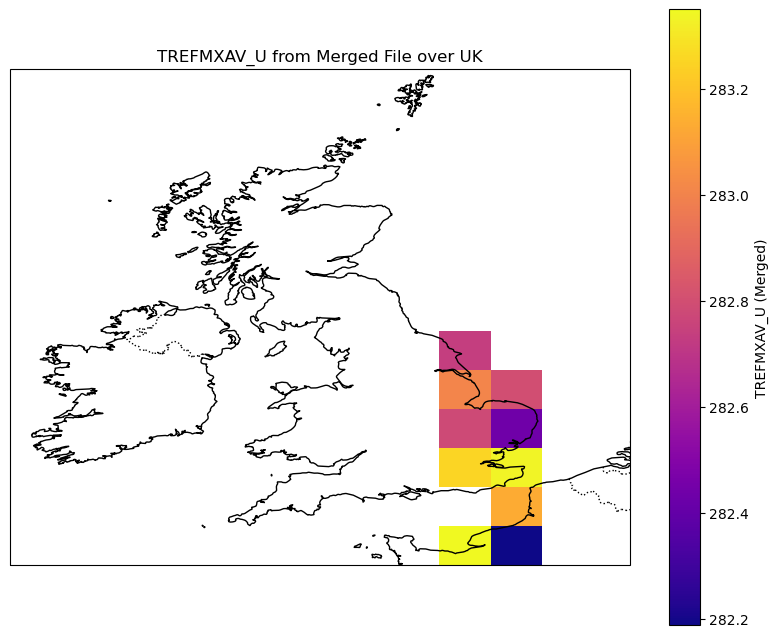

In [ ]:
# Load the merged dataset
ds = xr.open_dataset("003_2006_2080_0_2.nc", decode_times=False)
ds = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby("lon")
var = list(ds.data_vars)[0]
data = ds[var].isel(time=0)

# Prepare data for plotting
lon = data["lon"].values
lat = data["lat"].values
lon2d, lat2d = np.meshgrid(lon, lat)

# Handle missing values
values = data.values
masked = np.ma.masked_invalid(values)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.pcolormesh(lon2d, lat2d, masked, cmap="plasma")
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.set_extent([-11, 4, 49, 61], crs=ccrs.PlateCarree())
fig.colorbar(c, ax=ax, label=f"{var} (Merged)")
ax.set_title(f"{var} from Merged File over UK")

plt.show()

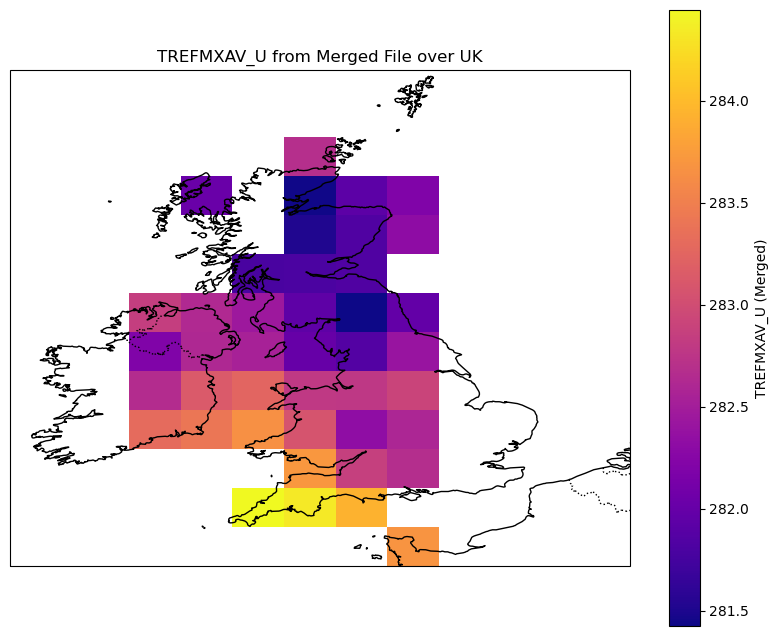

In [ ]:
# Load the merged dataset
ds = xr.open_dataset("003_2006_2080_352_360.nc", decode_times=False)
ds = ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby("lon")
var = list(ds.data_vars)[0]
data = ds[var].isel(time=0)

# Prepare data for plotting
lon = data["lon"].values
lat = data["lat"].values
lon2d, lat2d = np.meshgrid(lon, lat)

# Handle missing values
values = data.values
masked = np.ma.masked_invalid(values)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})
c = ax.pcolormesh(lon2d, lat2d, masked, cmap="plasma")
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':')
ax.set_extent([-11, 4, 49, 61], crs=ccrs.PlateCarree())
fig.colorbar(c, ax=ax, label=f"{var} (Merged)")
ax.set_title(f"{var} from Merged File over UK")

plt.show()